In [1]:

import pandas as pd
import warnings
import numpy as np
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:

combined_df=pd.read_hdf('combined_df_test.h5', key='df')

In [3]:
# combined_df=combined_df[combined_df['Kp_0h'] <30]
# flux_dict = {}
# for i in np.arange(1.1, 6.6, 0.1):
#     combined_df_i = combined_df[combined_df['Interpolated_Lstar'] > i]
#     combined_df_i = combined_df_i[combined_df_i['Interpolated_Lstar'] < i + 0.1]
#     #计算范围内的Flux均值
#     flux_mean = combined_df_i['Flux'].mean()
#     #将均值存入字典中
#     flux_dict[i] = flux_mean
# #将flux_dict保存为csv文件
# flux_df = pd.DataFrame(list(flux_dict.items()), columns=['Interpolated_Lstar', 'Flux'])
# print(flux_df)
# flux_df.to_csv('flux_L_1064.csv', index=False)

    Interpolated_Lstar        Flux
0                  1.1    0.003084
1                  1.2    0.000610
2                  1.3    0.000800
3                  1.4    0.000000
4                  1.5    1.161012
5                  1.6    4.470628
6                  1.7    3.900471
7                  1.8    1.667228
8                  1.9    0.474452
9                  2.0    0.056930
10                 2.1    0.022203
11                 2.2    0.024613
12                 2.3    0.052802
13                 2.4    0.114697
14                 2.5    0.464889
15                 2.6    0.804655
16                 2.7    3.303617
17                 2.8    6.039007
18                 2.9   15.063213
19                 3.0   29.533584
20                 3.1   47.932464
21                 3.2   78.023256
22                 3.3  147.873573
23                 3.4  207.312684
24                 3.5  269.313306
25                 3.6  360.320551
26                 3.7  445.877044
27                 3

In [3]:
print(combined_df)

                          Time         Flux  Flux_Error  PitchAngle  \
0      2012-10-05 00:02:15.891  1379.325195    2.129150  155.454545   
1      2012-10-05 00:03:22.160    54.141201    7.784909  106.363636   
2      2012-10-05 00:03:43.449   741.628357    4.000000    8.181818   
3      2012-10-05 00:04:38.170  1736.725220    1.414217   40.909091   
4      2012-10-05 00:05:00.649    53.410698    8.124733   90.000000   
...                        ...          ...         ...         ...   
886342 2018-12-31 23:39:18.970     0.000000  198.313507   73.636364   
886343 2018-12-31 23:39:50.893     0.468969   87.064613   40.909091   
886344 2018-12-31 23:40:33.457     0.000000  160.196167   90.000000   
886345 2018-12-31 23:41:58.585     0.662809   70.756607  139.090909   
886346 2018-12-31 23:52:58.329     0.000000  133.242050  106.363636   

            B_Calc        B_Eq         I         L    L_star        MLT  ...  \
0       462.260007  431.858483  0.167121  4.091372  3.862556   4.13

In [4]:
time_steps=150
VX_time1 = [f'VX_{i}h' for i in range(0, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(0, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(0, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(0, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(0, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(0, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(0, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(0, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(0, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(0, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(0, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(0, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(0, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(0, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(0, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(0, time_steps + 1)]


In [5]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
# X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
# X_time7 = combined_df[Kp_time7].values
# X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
# X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time6,X_time9,X_time10,X_time11,X_time12,X_time13,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'MLT','Interpolated_Lstar', 'PitchAngle','MLAT']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y = np.log10(combined_df['Flux'].values+0.2 ) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(886347, 151, 12)


In [6]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 151  # 根据您的数据调整
num_features = 12  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)
X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)


# 归一化 Flux_Error
scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.2
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [7]:
print(X_non_time[:,2].min(), X_non_time[:,2].max())
original_value = 2.6

# 使用 scaler_non_time 转换原始值为标准化后的值
scaled_value = scaler_non_time.transform([[0, 0, original_value, 0]])

L_YZ=scaled_value[0,2]
print(L_YZ)

-1.7403737172825764 1.889161624065997
-1.8641812005930225


In [8]:
X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.2, random_state=42
)

In [9]:
#读入模型
model = tf.keras.models.load_model('LSTM_HIGH_0_model.h5')


5540/5540 [==============================] - 17s 3ms/step
测试集上的 RMSE: 0.20670292832757564 测试集上的 R2: 0.9782461126094127
测试集上的 RMSE_10: 227.25957478824324
预测效率 (PE): 0.9782461126094127


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


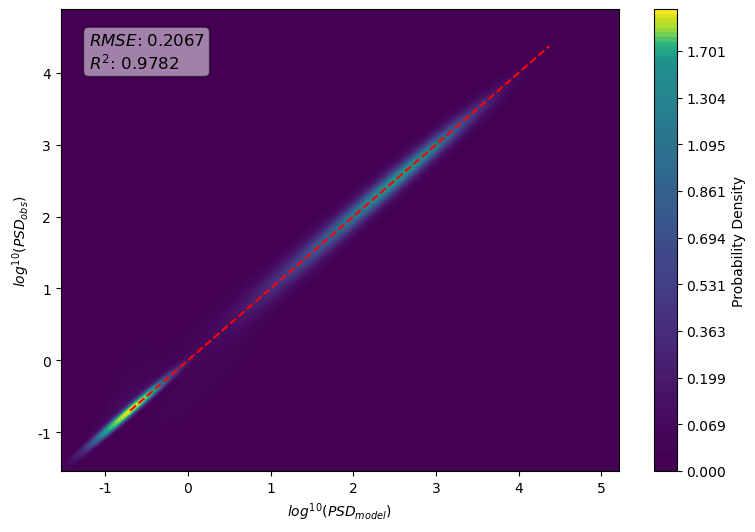

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False

mask = X_non_time_val[:,2] < L_YZ
X_non_time_val_out = X_non_time_val[~mask]
X_time_val_out = X_time_val[~mask]
y_val_out = y_val[~mask]

y_pred_scaled = model.predict([X_time_val_out, X_non_time_val_out])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val_out)
# 生成布尔掩码


y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')

y_test_10 = 10**y_test_exp
y_pred_10 = 10**y_pred_exp
rmse_10 = np.sqrt(mean_squared_error(y_test_10, y_pred_10)) 
print(f'测试集上的 RMSE_10: {rmse_10}')

# 计算PE
observed_values = y_test_exp  # 真实值
predicted_values = y_pred_exp  # 预测值
mean_observed = np.mean(observed_values)  # 真实值的均值

# 计算PE
numerator = np.sum((observed_values - predicted_values) ** 2)
denominator = np.sum((observed_values - mean_observed) ** 2)

pe = 1 - (numerator / denominator)

print(f'预测效率 (PE): {pe}')





# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100,
    bw_adjust=1.5
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections


if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density')

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-10, -6)
# plt.ylim(-10, -6)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$')
plt.ylabel('$log^{10}(PSD_{obs})$')
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()


In [12]:
#保存
#保存y_test_exp, y_pred_exp,为txt文件
np.savetxt('high_0_y_test_exp.txt', y_test_exp)
np.savetxt('high_0_y_pred_exp.txt', y_pred_exp)